In [1]:
import os

os.environ["KERAS_BACKEND"] = "torch"
import keras

print(keras.__version__)

3.9.2


In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


In [6]:
# Model parameters
num_classes = 10
input_shape = (28, 28, 1)

In [7]:
# the model
model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,298 (1016.79 KB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)

In [10]:
batch_size = 128
epochs = 20

callbacks = [
    # keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]

In [11]:
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)

Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 49s 124ms/step - acc: 0.5339 - loss: 1.3110 - val_acc: 0.9620 - val_loss: 0.1337
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 51s 127ms/step - acc: 0.9283 - loss: 0.2399 - val_acc: 0.9771 - val_loss: 0.0789
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 49s 122ms/step - acc: 0.9530 - loss: 0.1569 - val_acc: 0.9804 - val_loss: 0.0686
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 47s 117ms/step - acc: 0.9629 - loss: 0.1247 - val_acc: 0.9813 - val_loss: 0.0577
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 48s 121ms/step - acc: 0.9701 - loss: 0.1007 - val_acc: 0.9884 - val_loss: 0.0420
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 48s 120ms/step - acc: 0.9704 - loss: 0.0951 - val_acc: 0.9873 - val_loss: 0.0422
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 50s 125ms/step - acc: 0.9753 - loss: 0.0818 - val_acc: 0.9888 - val_loss: 0.0399
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 52s 130ms/step - acc: 0.9770 - loss: 0.0758 - val_acc: 0.9896 - val_loss: 0.0404
Epoch 9/20
399/399 ━━━━━━━━━━━━━

In [12]:
score = model.evaluate(x_test, y_test, verbose="0")
score

[0.02314998023211956, 0.9927999973297119]

In [13]:
# model.save("final_model.keras")
# model = keras.saving.load_model("final_model.keras")

In [14]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [15]:
np.max(predictions[2]), np.argmax(predictions[2])

(np.float32(0.9998086), np.int64(1))

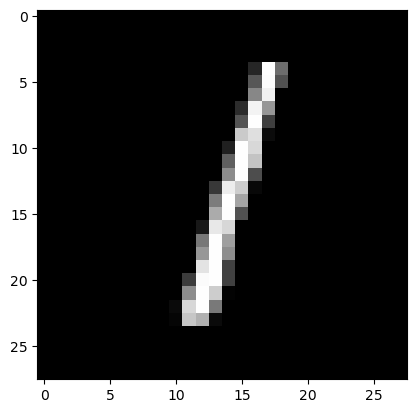

In [16]:
plt.imshow(x_test[2].squeeze(), cmap=plt.get_cmap('gray'))